In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

## RandomPath function
 **'randomPath' only create one path.**
- maxTime = maximum time of one execution.
- minTimePP = minimum random time between two points of the path.
- maxTimePP = maximum random time between two points of the path.
- size = Size of the grid [size,size]
- flightAltitude = Flight altitude.
- posArrayInitial = Initial position index.

In [3]:
def movement(direction):
    #1 - North
    #2 - North-East
    #3 - East
    #.....
    #8 - North-West
    mov_x = 0
    mov_y = 0
    if direction == 1:
        mov_y = -1
    elif direction == 2:
        mov_x = 1
        mov_y = -1
    elif direction == 3:
        mov_x = 1
    elif direction == 4:
        mov_x = 1
        mov_y = 1
    elif direction == 5:
        mov_y = 1
    elif direction == 6:
        mov_x = -1
        mov_y = 1
    elif direction == 7:
        mov_x = -1
    else:
        mov_x = -1
        mov_y = -1
    return mov_x,mov_y   


def canMove(posX,posY,movX,movY,map):
    ans = False
    posX1 = posX + movX
    posY1 = posY + movY
    if map[posY1,posX1] != 0:
        ans = True
    return ans



def randomPath(maxTime,minTimePP,maxTimePP,size,flightAltitude,posArrayInitial):
    time_array = np.array([],dtype=np.int16)
    flagTime = False
    
    while not flagTime:
        num = int(random.uniform(minTimePP,maxTimePP))
        if time_array.sum()+num >= maxTime:
            flagTime = True 
        else:
            time_array = np.append(time_array,num)

    posX,posY,_ = posArrayInitial
    
    #Create the Map/Grid
    baseArray_path = np.ones((size,size))
    baseArray_path = np.pad(baseArray_path,pad_width=1)
    baseArray_path[posY,posX] = 0

    path = [[posX,posY,flightAltitude]]
    cont = 0
    contLimit = 0

    while not np.all(baseArray_path == 0) and cont < time_array.shape[0] and contLimit <=10000:
        #Decide the direction
        dir = random.randint(1,8)
        movX,movY = movement(dir)

        #Can move in that direction?
        flagMove = canMove(posX,posY,movX,movY,baseArray_path)
        contMove = 0

        while contMove <= int(size/2) and flagMove:
            #Move
            posX = posX + movX
            posY = posY + movY
            #Upload Map/Grid 
            baseArray_path[posY,posX] = 0

            #Can continue move in that direction?
            flagMove = canMove(posX,posY,movX,movY,baseArray_path)
            contMove += 1
            #print(contMove)

            if not flagMove and contMove <= int(size/2):
                path.append([posX,posY,flightAltitude])
                cont += 1
        contLimit+=1

    return baseArray_path,path,time_array


In [12]:
mapa,path,time = randomPath(700,40,80,20,1,[5,5])   

In [13]:
path

[[5, 5, 1],
 [5, 1, 1],
 [3, 3, 1],
 [4, 4, 1],
 [3, 4, 1],
 [1, 2, 1],
 [1, 4, 1],
 [1, 1, 1],
 [1, 4, 1],
 [2, 3, 1],
 [1, 3, 1],
 [2, 3, 1],
 [3, 4, 1]]

In [20]:
time

array([43, 52, 76, 52, 61, 54, 70, 55, 70, 43, 43, 41])

[[ 5  5  1]
 [ 5 10  1]
 [ 1  6  1]
 [ 6  1  1]
 [10  1  1]
 [ 6  5  1]
 [ 6 10  1]
 [10 10  1]
 [ 8  4  1]
 [10  2  1]
 [10  3  1]]


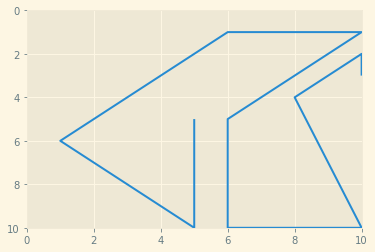

In [51]:
mapa,path,time = randomPath(700,40,80,10,1,[5,5])   
path = np.array(path)
print(path)
plt.style.use('Solarize_Light2')
plt.plot(path[:,0],path[:,1])
plt.xlim([0,10])
plt.ylim([0,10])
plt.gca().invert_yaxis()
plt.show()

In [52]:
time

array([68, 43, 67, 56, 78, 66, 55, 74, 61, 47, 67])

In [4]:
def cal_Total_Distance(pathArray):
    distance_Total = 0
    distance_Array = np.zeros(pathArray.shape[0])
    for i in range(1,pathArray.shape[0]):
        distance_Array[i-1] = np.linalg.norm(pathArray[i-1]-pathArray[i])
    distance_Total = distance_Array.sum()
        
    return distance_Total,distance_Array

def cal_Total_Turns(pathArray):
    total_Turns = 0
    flag_turn = np.zeros(pathArray.shape[0]-1)
    for i in range(1,pathArray.shape[0]-1):
        dot_val = np.dot(pathArray[i-1]-pathArray[i],pathArray[i+1]-pathArray[i])
        mag_A = np.linalg.norm(pathArray[i-1]-pathArray[i])
        mag_B = np.linalg.norm(pathArray[i+1]-pathArray[i])
        fracc = dot_val/(np.dot(mag_A,mag_B)+1E-9)
        #print(fracc)
        flag = math.acos(fracc)
        flag_turn[i-1] = flag
        if flag != 0.0:
            total_Turns+=1
    return total_Turns

In [5]:
def changeToTxt(pathArr,timeArr,idx):
    time = ''
    path = ''
    for i in timeArr:
        time =  time + str(i) + ','

    for i in pathArr:
        path = path + str(i) + ';'

    final = str(idx)+'|'+path+'|'+time
    final = final[:-1]
    return final

In [6]:
##### Ubuntu
#file_path = '/home/sebastian/Desktop/'
#file = open(file_path + 'path_v13.txt',mode="w")

##### Windows
file_path = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/OctavoSemestre/ProblemaEspecial/ML/path/"
file = open(file_path + 'path_v13.txt',mode="w")
file_pd = open(file_path + 'distanceTurn_v13.csv',mode="w")
file_pd.close()

numRoad = 2000
disTotalArray = np.zeros((numRoad,1))
totalTurnsArray = np.zeros((numRoad,1))


sizeGrid = 12 #Grid of nxn
timeSimulation = 700 #Seconds
minTime = 50 #minimum time between two points of the path.
maxTime = 300 #Maximum time between two points of the path.
initialCoor = [6,6,1] #Initial coordenates.



for i in range(numRoad):
    Flag = False
    if i == 0:
        while not Flag:
            _,path,time = randomPath(timeSimulation,minTime,maxTime,sizeGrid,1,initialCoor)
            #disTotal,disArray = cal_Total_Distance(path)
            path = np.array(path)
            total_turns = cal_Total_Turns(path)
            if path.shape[0] == len(time) + 1:
                Flag = True
    else:
        while not Flag:
            _,path,time = randomPath(timeSimulation,minTime,maxTime,sizeGrid,1,path[-1,:])
            #disTotal,disArray = cal_Total_Distance(path)
            path = np.array(path)
            total_turns = cal_Total_Turns(path)
            if path.shape[0] == len(time) + 1:
                Flag = True

    #disTotalArray[i,0] = disTotal
    totalTurnsArray[i,0] = total_turns

    path = path.astype(int)
    final = ''
    final = changeToTxt(path,time,i+1)
    file.write('\n')
    file.write(final)

file.close()

#d = {'disTotal':disTotalArray.reshape(-1),'totalTurns':totalTurnsArray.reshape(-1)}
d = {'totalTurns':totalTurnsArray.reshape(-1)}
pd_values = pd.DataFrame(data=d)
pd_values.to_csv(file_path + 'distanceTurn_v13.csv',index=False)